# SVM for classification

Load IRIS dataset, check its contents:


In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names

print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [2]:
from sklearn.model_selection import train_test_split
X=iris.data                                                                 # lenghts and widths of sepal and petal (2D vector)
y=iris.target                                                               # target variable/species of iris (1D vector)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    # spliting the data (20% for testing, 80% for training)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


Use a Support Vector Machine for classification:


In [ ]:
#not using anymore
'''
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)           # trainning the SVM classifier
SVMmodel.get_params()                   # returns parameters of SVM model
SVMmodel.score(X_test,y_test)           # returns the classification accuracy of the SVM model on the testing data (1.0 means 100% accuracy)
'''

1.0

Let's explore more now. 

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [4]:
from sklearn.model_selection import train_test_split
X = iris.data[iris.target!= 2,0:2]                        # taking only the first 2 classes and first 2 input variables
y = iris.target[iris.target!=2]                           # selecting only the first 2 classes of the target variable subset

#X = iris.data[:,0:2]
#y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)


print(X_train.shape)
print(X_test.shape)
print(y.shape)

(80, 2)
(20, 2)
(100,)


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

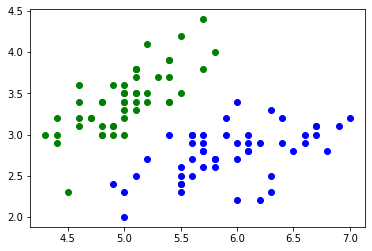

In [5]:
import matplotlib.pyplot as plt 
plt.scatter(X[y==0,0],X[y==0,1], color = 'green')         # plotting class 0
plt.scatter(X[y==1,0],X[y==1,1], color = 'blue')          # plotting class 1

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [6]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)           # trainning the SVM classifier
SVMmodel.get_params()                   # returns parameters of SVM model
SVMmodel.score(X_test,y_test)           # returns the classification accuracy of the SVM model on the testing data (1.0 means 100% accuracy)

1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

[[ 2.22194741 -2.22227469]]
[-4.99831176]


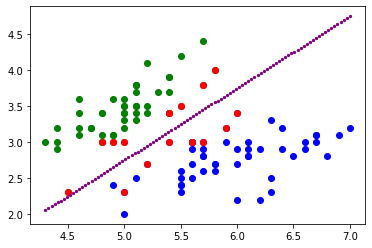

In [10]:
supvectors = SVMmodel.support_vectors_
# Plot the support vectors here
#print(supvectors.shape)
plt.scatter(X[y==0,0],X[y==0,1], color = 'green')
plt.scatter(X[y==1,0],X[y==1,1], color = 'blue')
plt.scatter(supvectors[:,0],supvectors[:,1], color = 'red')     # plotting supvectors (closest to hyperlane)

#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
print(W)
print(b)

supvectors
import numpy as np
xgr = np.linspace(min(X[:,0]),max(X[:,0]),100)
#print(xgr)

ygr = -W[:,0]/W[:,1]*xgr-b/W[:,1]
plt.scatter(xgr, ygr, s=5, color = 'purple')

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

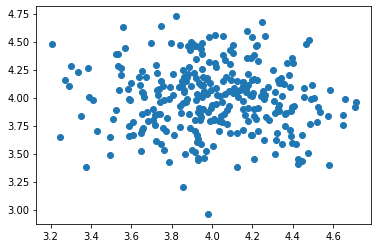

In [11]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()

Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

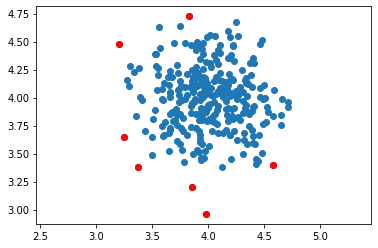

In [12]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)

SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

Plot the support vectors:

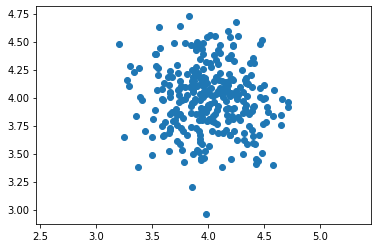

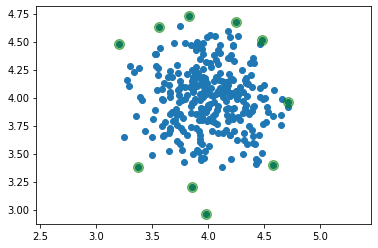

In [13]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1])
plt.axis('equal')
plt.show()

SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
SVMmodelOne.fit(x)

support_indices = SVMmodelOne.support_  # Retrieving the indices of the support vectors

# Plot the data points and the support vectors
plt.scatter(x[:,0], x[:,1])
plt.scatter(x[support_indices,0], x[support_indices,1], color='green', s=100, alpha=0.5)
plt.axis('equal')
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

In [ ]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

NameError: ignored